In [1]:
import pandas as pd
import numpy as np
import twosigmafunc

import matplotlib.pyplot as plt
import seaborn
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
train = pd.read_hdf('train.h5')

In [4]:
null_labels = [
 'technical_21',
 'technical_19',
 'technical_27',
 'technical_36',
 'technical_35',
 'technical_17',
 'technical_43',
 'technical_13',
 'fundamental_33',
 'technical_14',
 'technical_33',
 'fundamental_18',
 'fundamental_48',
 'fundamental_59',
 'technical_9',
 'technical_16',
 'technical_42',
 'technical_18',
 'fundamental_42',
 'fundamental_0',
 'fundamental_7',
 'fundamental_41',
 'technical_41',
 'fundamental_21',
 'fundamental_19',
 'technical_29',
 'technical_24',
 'derived_0',
 'derived_1',
 'fundamental_17',
 'technical_3',
 'fundamental_20',
 'fundamental_32',
 'fundamental_62',
 'fundamental_25',
 'technical_1',
 'fundamental_58',
 'derived_3',
 'technical_5',
 'fundamental_52',
 'technical_10',
 'technical_31',
 'technical_25',
 'technical_44',
 'technical_28',
 'fundamental_40',
 'fundamental_27',
 'fundamental_29',
 'fundamental_43',
 'fundamental_15',
 'fundamental_30',
 'fundamental_60',
 'fundamental_16',
 'fundamental_50',
 'fundamental_44',
 'fundamental_37',
 'fundamental_14',
 'fundamental_23',
 'fundamental_55',
 'fundamental_8',
 'fundamental_63',
 'fundamental_39',
 'fundamental_54',
 'derived_2',
 'derived_4',
 'fundamental_35',
 'fundamental_34',
 'fundamental_47',
 'fundamental_51',
 'fundamental_31',
 'fundamental_49',
 'fundamental_22',
 'fundamental_9',
 'fundamental_24',
 'fundamental_57',
 'fundamental_28',
 'fundamental_61',
 'fundamental_1',
 'fundamental_6',
 'fundamental_38',
 'fundamental_5']

In [5]:
excl = ['id', 'timestamp', 'y']
cols_origin = [col for col in train.columns if col not in ['y']]
feature_origin = [col for col in train.columns if col not in excl]
feature_diff = [col + '_diff' for col in feature_origin]


# Add differs 

In [6]:
# add time series diff
d_mean = train.median()
train.sort_values(['id', 'timestamp'], inplace=True)
train['id_diff'] = train.id.diff()
d_mean['id_diff'] = 0.0
for col in feature_origin:
    train[col + '_diff'] = train[col].diff()
    d_mean[col + '_diff'] = 0.0

train.loc[train.id_diff!=0, feature_diff] = 0


In [6]:
train.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_35_diff,technical_36_diff,technical_37_diff,technical_38_diff,technical_39_diff,technical_40_diff,technical_41_diff,technical_42_diff,technical_43_diff,technical_44_diff
131062,0,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131895,0,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132728,0,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133561,0,170,-0.230583,0.488096,0.93592,0.028222,-0.083071,-0.240929,NaN,0.212425,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134393,0,171,-0.230583,0.488096,0.93592,0.028222,-0.083071,-0.240929,NaN,0.212425,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN


# add `nan` tags 

In [7]:
n = train.isnull().sum(axis=1)
for c in null_labels:
    train[c + '_nan'] = pd.isnull(train[c])
    d_mean[c + '_nan'] = 0
train = train.fillna(d_mean)
train['nullcounts'] = n

In [8]:
train.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,fundamental_9_nan,fundamental_24_nan,fundamental_57_nan,fundamental_28_nan,fundamental_61_nan,fundamental_1_nan,fundamental_6_nan,fundamental_38_nan,fundamental_5_nan,nullcounts
131062,0,167,-0.000837,0.005523,0.021095,0.002476,0.011752,-0.040645,-0.007395,-0.030291,...,True,True,True,True,True,True,True,True,True,107
131895,0,168,-0.000837,0.005523,0.021095,0.002476,0.011752,-0.040645,-0.007395,-0.030291,...,True,True,True,True,True,True,True,True,True,212
132728,0,169,-0.000837,0.005523,0.021095,0.002476,0.011752,-0.040645,-0.007395,-0.030291,...,True,True,True,True,True,True,True,True,True,212
133561,0,170,-0.230583,0.488096,0.935920,0.028222,-0.083071,-0.240929,-0.007395,0.212425,...,False,False,False,False,True,True,False,False,False,125
134393,0,171,-0.230583,0.488096,0.935920,0.028222,-0.083071,-0.240929,-0.007395,0.212425,...,False,False,False,False,True,True,False,False,False,38


# Add special features 

In [8]:
train['tec20-30'] = train.technical_20 - train.technical_30
train['tec123'] = train['tec20-30'] + train.technical_13
train['y_past'] = train.y.shift()
train['tec123_past'] = train.tec123.shift()
train.loc[train.id_diff != 0, ['y_past', 'tec123_past']] = 0
train.fillna(0, inplace=True)

In [9]:
train['y_past_p'] = twosigmafunc.predict_y_past(train[['tec123_past', 'tec123']])

In [12]:
train.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,fundamental_1_nan,fundamental_6_nan,fundamental_38_nan,fundamental_5_nan,nullcounts,tec20-30,tec123,y_past,tec123_past,y_past_p
131062,0,167,-0.000837,0.005523,0.021095,0.002476,0.011752,-0.040645,-0.007395,-0.030291,...,True,True,True,True,107,0.0,0.0,0.000000,0.0,-0.0002
131895,0,168,-0.000837,0.005523,0.021095,0.002476,0.011752,-0.040645,-0.007395,-0.030291,...,True,True,True,True,212,0.0,0.0,-0.007108,0.0,-0.0002
132728,0,169,-0.000837,0.005523,0.021095,0.002476,0.011752,-0.040645,-0.007395,-0.030291,...,True,True,True,True,212,0.0,0.0,0.001950,0.0,-0.0002
133561,0,170,-0.230583,0.488096,0.935920,0.028222,-0.083071,-0.240929,-0.007395,0.212425,...,True,False,False,False,125,0.0,0.0,0.017724,0.0,-0.0002
134393,0,171,-0.230583,0.488096,0.935920,0.028222,-0.083071,-0.240929,-0.007395,0.212425,...,True,False,False,False,38,0.0,0.0,0.012934,0.0,-0.0002


In [10]:
feature_cols = [col for col in train.columns if col not in excl + ['y_past_p']]
X_train, y_train, X_test, y_test = twosigmafunc.split_data(train, feature_cols)

In [10]:
X_train.head()

,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,fundamental_3,fundamental_5,...,fundamental_61_nan,fundamental_1_nan,fundamental_6_nan,fundamental_38_nan,fundamental_5_nan,nullcounts,tec20-30,tec123,y_past,tec123_past
131062,-0.000837,0.005523,0.021095,0.002476,0.011752,-0.040645,-0.007395,-0.030291,-0.040183,0.033375,...,True,True,True,True,True,107,0.0,0.0,0.000000,0.0
131895,-0.000837,0.005523,0.021095,0.002476,0.011752,-0.040645,-0.007395,-0.030291,-0.040183,0.033375,...,True,True,True,True,True,212,0.0,0.0,-0.007108,0.0
132728,-0.000837,0.005523,0.021095,0.002476,0.011752,-0.040645,-0.007395,-0.030291,-0.040183,0.033375,...,True,True,True,True,True,212,0.0,0.0,0.001950,0.0
133561,-0.230583,0.488096,0.935920,0.028222,-0.083071,-0.240929,-0.007395,0.212425,-0.178111,-0.126889,...,True,True,False,False,False,125,0.0,0.0,0.017724,0.0
134393,-0.230583,0.488096,0.935920,0.028222,-0.083071,-0.240929,-0.007395,0.212425,-0.178111,-0.126889,...,True,True,False,False,False,38,0.0,0.0,0.012934,0.0


# XGBoost

In [11]:
from xgboost import XGBRegressor

/usr/local/lib/python3.4/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
init_features = ['y_past',
 'tec20-30',
 'technical_30',
 'tec123',
 'technical_43',
 'technical_43_diff',
 'tec123_past',
 'technical_11_diff',
 'technical_2_diff',
 'technical_11',
 'technical_20',
 'technical_2',
 'fundamental_25_nan',
 'technical_14_diff',
 'technical_21_diff',
 'technical_9_nan',
 'technical_40',
 'technical_30_diff',
 'technical_6_diff',
 'technical_6',
 'technical_17_diff',
 'technical_17',
 'technical_14',
 'technical_7',
 'technical_19',
 'technical_44_nan',
 'fundamental_27_nan',
 'technical_18_nan',
 'technical_28_nan',
 'technical_21',
 'technical_42_nan',
 'technical_29_diff',
 'technical_20_diff',
 'technical_31_nan',
 'fundamental_53',
 'technical_24_nan',
 'technical_36',
 'technical_19_diff',
 'technical_27',
 'technical_29',
 'technical_35',
 'technical_22',
 'technical_41_nan',
 'fundamental_8',
 'fundamental_21',
 'fundamental_17_nan',
 'technical_34',
 'technical_16_nan',
 'technical_27_diff',
 'fundamental_33_nan',
 'fundamental_58',
 'derived_1_nan',
 'technical_10',
 'technical_25_nan',
 'fundamental_18',
 'fundamental_59',
 'technical_40_diff',
 'nullcounts',
 'fundamental_5_nan',
 'fundamental_48',
 'fundamental_47_nan',
 'technical_36_diff',
 'fundamental_41_nan',
 'fundamental_42_nan',
 'fundamental_0_nan',
 'fundamental_50',
 'fundamental_40',
 'technical_3_nan',
 'fundamental_23',
 'fundamental_49_nan',
 'fundamental_36',
 'technical_44',
 'fundamental_2',
 'fundamental_0',
 'technical_41',
 'fundamental_62_diff',
 'technical_38_diff',
 'fundamental_22_nan',
 'technical_12',
 'fundamental_62',
 'technical_37_diff',
 'fundamental_44',
 'technical_29_nan',
 'fundamental_24_nan',
 'technical_10_nan',
 'fundamental_46',
 'technical_1',
 'fundamental_54_nan',
 'fundamental_0_diff',
 'technical_12_diff',
 'technical_35_diff',
 'derived_3_nan',
 'fundamental_63_nan',
 'fundamental_31_nan',
 'fundamental_40_nan',
 'fundamental_35_nan',
 'technical_3',
 'fundamental_13']

In [13]:
low_y_cut = -0.075
high_y_cut = 0.075
y_is_above_cut = (y_train > high_y_cut)
y_is_below_cut = (y_train < low_y_cut)
y_is_within_cut = (~y_is_above_cut & ~y_is_below_cut)

In [14]:
xgb = XGBRegressor(n_estimators=80, nthread=-1, max_depth=3, learning_rate=0.1, reg_lambda=1, subsample=1, colsample_bytree=1, seed=11)

In [15]:
xgb.fit(X_train.loc[y_is_within_cut, init_features], y_train.loc[y_is_within_cut])

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=80, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=11, silent=True, subsample=1)

In [16]:
y_xgb = xgb.predict(X_test[init_features])

In [17]:
from twosigmafunc import R_score
R_score(y_xgb, y_test)

0.024356621880906697

In [18]:
y_t = xgb.predict(X_train[init_features])
R_score(y_t, y_train)

0.070004956206204547

while, stong overfit here...
set `colsamples_bytree` = 0.6

In [19]:
xgb = XGBRegressor(n_estimators=80, nthread=-1, max_depth=3, learning_rate=0.1, reg_lambda=1, subsample=1,
                   colsample_bytree=0.6, seed=11)
xgb.fit(X_train.loc[y_is_within_cut, init_features], y_train.loc[y_is_within_cut])

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=80, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=11, silent=True, subsample=1)

In [20]:
y_xgb = xgb.predict(X_test[init_features])
R_score(y_xgb, y_test)

0.024503011790849502

In [21]:
y_t = xgb.predict(X_train[init_features])
R_score(y_t, y_train)

0.068416027027381712

improve a little, try limit `subsample`

In [22]:
xgb = XGBRegressor(n_estimators=80, nthread=-1, max_depth=3, learning_rate=0.1, reg_lambda=1, subsample=0.8,
                   colsample_bytree=0.6, seed=11)
xgb.fit(X_train.loc[y_is_within_cut, init_features], y_train.loc[y_is_within_cut])

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=80, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=11, silent=True, subsample=0.8)

In [23]:
y_xgb = xgb.predict(X_test[init_features])
R_score(y_xgb, y_test)

0.026742036721520236

In [24]:
y_t = xgb.predict(X_train[init_features])
R_score(y_t, y_train)

0.067888655551662708

reduce overfit !! now add `reg`

In [25]:
xgb = XGBRegressor(n_estimators=80, nthread=-1, max_depth=3, learning_rate=0.1, reg_lambda=1.5, subsample=0.8,
                   colsample_bytree=0.6, seed=11)
xgb.fit(X_train.loc[y_is_within_cut, init_features], y_train.loc[y_is_within_cut])

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=80, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1.5,
       scale_pos_weight=1, seed=11, silent=True, subsample=0.8)

In [26]:
y_xgb = xgb.predict(X_test[init_features])
R_score(y_xgb, y_test)

0.026675086678933459

In [27]:
y_t = xgb.predict(X_train[init_features])
R_score(y_t, y_train)

0.06649101681373995

not so good, try plot the accumulation R score

In [28]:
reward = []
stamp = 906
y_true_acc = []
y_pred_acc = []
print('without clip')
while stamp <= train.timestamp.max():
    x = train.loc[train.timestamp == stamp, init_features]
    y_pred = xgb.predict(x)
    y_true = train.loc[train.timestamp == stamp, 'y']
    y_pred_acc.extend(list(y_pred))
    y_true_acc.extend(list(y_true))
    score = twosigmafunc.R_score(np.array(y_pred_acc), np.array(y_true_acc))
    reward.append(score)
    stamp += 1
    if stamp % 100 == 0:
        print(stamp, score)

without clip
1000 -0.0317176164697
1100 -0.0231972139067
1200 -0.0143815199951
1300 -0.0232126256328
1400 -0.031192727058
1500 -0.0228633491571
1600 0.0305634420987
1700 0.0326354929102
1800 0.0277741482801


(-0.1, 0.034)

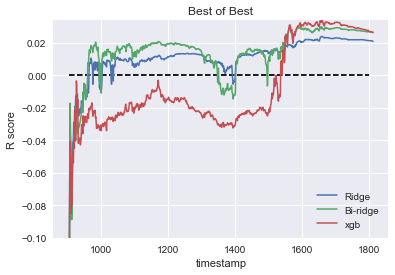

In [29]:
ridge_data = pd.read_csv('Linear_R_score.csv')
plt.title('Best of Best')
plt.xlabel('timestamp')
plt.ylabel('R score')
plt.plot([905, 1801], [0, 0], 'k--')
plt.plot(ridge_data.timestamp, ridge_data.Ridge, lw=1.5, label='Ridge')
plt.plot(ridge_data.timestamp, ridge_data.Bi_Ridge, lw=1.5, label='Bi-ridge')
# plt.plot(ridge_data.timestamp, ridge_data.Mixed_model, lw=1.5, label='Mixed-Ridge')
plt.plot(ridge_data.timestamp, reward,lw=1.5, label='xgb')
plt.legend(loc='best')
plt.ylim(-0.1, 0.034)

In [30]:
xgb_imp = xgb.booster().get_fscore()

In [31]:
xgb_features = [x[0] for x in xgb_imp.items() if x[1] > 1]

In [32]:
len(xgb_features)

58

In [34]:
xgb = XGBRegressor(n_estimators=80, nthread=-1, max_depth=3, learning_rate=0.1, reg_lambda=1, subsample=0.8,
                   colsample_bytree=0.6, seed=11)
xgb.fit(X_train.loc[y_is_within_cut, xgb_features], y_train.loc[y_is_within_cut])

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=80, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=11, silent=True, subsample=0.8)

In [35]:
y_xgb = xgb.predict(X_test[xgb_features])
R_score(y_xgb, y_test)

0.024874802861798325

In [36]:
y_t = xgb.predict(X_train[xgb_features])
R_score(y_t, y_train)

0.067553318299647253

In [38]:
xgb_imp = xgb.booster().get_fscore()
xgb_features = [x[0] for x in xgb_imp.items() if x[1] > 2]
len(xgb_features)

51

In [39]:
xgb = XGBRegressor(n_estimators=80, nthread=-1, max_depth=3, learning_rate=0.1, reg_lambda=1, subsample=0.8,
                   colsample_bytree=0.6, seed=11)
xgb.fit(X_train.loc[y_is_within_cut, xgb_features], y_train.loc[y_is_within_cut])

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=80, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=11, silent=True, subsample=0.8)

In [40]:
y_xgb = xgb.predict(X_test[xgb_features])
R_score(y_xgb, y_test)

0.024384748025749556

In [41]:
y_t = xgb.predict(X_train[xgb_features])
R_score(y_t, y_train)

0.066938177196165224

In [69]:
xgb = XGBRegressor(n_estimators=80, nthread=-1, max_depth=3, learning_rate=0.1, reg_lambda=1, subsample=1.0,
                   colsample_bytree=0.5, seed=11)
xgb.fit(X_train[xgb_features], y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.5,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=80, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=11, silent=True, subsample=1.0)

In [70]:
y_xgb = xgb.predict(X_test[xgb_features])
R_score(y_xgb, y_test)

0.023853426148582491

In [42]:
y_t = xgb.predict(X_train[xgb_features])
R_score(y_t, y_train)

0.066938177196165224

In [43]:
low_y_cut = -0.075
high_y_cut = 0.075
reward = []
stamp = 906
y_true_acc = []
y_pred_acc = []
print('without clip')
while stamp <= train.timestamp.max():
    x = train.loc[train.timestamp == stamp, xgb_features]
    y_pred = xgb.predict(x)
    y_true = train.loc[train.timestamp == stamp, 'y']
    y_pred_acc.extend(list(y_pred))
    y_true_acc.extend(list(y_true))
    score = twosigmafunc.R_score(np.array(y_pred_acc), np.array(y_true_acc))
    reward.append(score)
    stamp += 1
    if stamp % 100 == 0:
        print(stamp, score)

without clip
1000 -0.0378992444489
1100 -0.0270919101535
1200 -0.0180565059444
1300 -0.0254258132069
1400 -0.0345974056308
1500 -0.0255987004487
1600 0.029662834763
1700 0.0304285811687
1800 0.0258074078652


(-0.1, 0.034)

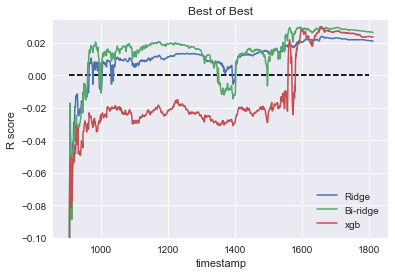

In [65]:
plt.title('Best of Best')
plt.xlabel('timestamp')
plt.ylabel('R score')
plt.plot([905, 1801], [0, 0], 'k--')
plt.plot(ridge_data.timestamp, ridge_data.Ridge, lw=1.5, label='Ridge')
plt.plot(ridge_data.timestamp, ridge_data.Bi_Ridge, lw=1.5, label='Bi-ridge')
# plt.plot(ridge_data.timestamp, ridge_data.Mixed_model, lw=1.5, label='Mixed-Ridge')
plt.plot(ridge_data.timestamp, reward,lw=1.5, label='xgb')
plt.legend(loc='best')
plt.ylim(-0.1, 0.034)

## combine xgb and etr

In [71]:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
etr = ExtraTreesRegressor(n_jobs=-1,n_estimators=256, max_depth=6, max_features=0.6, min_samples_leaf=25,
                          random_state=17, verbose=0)
etr.fit(X_train[init_features], y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=6,
          max_features=0.6, max_leaf_nodes=None, min_impurity_split=1e-07,
          min_samples_leaf=25, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=256, n_jobs=-1,
          oob_score=False, random_state=17, verbose=0, warm_start=False)

In [72]:
y_etr = etr.predict(X_test[init_features])

In [73]:
for a in np.linspace(0, 1, 9):
    y = y_xgb * a + y_etr * (1 - a)
    print('a={a:.4f}, score {b:.7f}'.format(a=a, b=R_score(y, y_test)))

a=0.0000, score 0.0296921
a=0.1250, score 0.0308124
a=0.2500, score 0.0314108
a=0.3750, score 0.0315173
a=0.5000, score 0.0311367
a=0.6250, score 0.0302507
a=0.7500, score 0.0288127
a=0.8750, score 0.0267339
a=1.0000, score 0.0238472


In [74]:
for a in np.linspace(0.2, 0.4, 9):
    y = y_xgb * a + y_etr * (1 - a)
    print('a={a:.4f}, score {b:.7f}'.format(a=a, b=R_score(y, y_test)))

a=0.2000, score 0.0312315
a=0.2250, score 0.0313311
a=0.2500, score 0.0314108
a=0.2750, score 0.0314710
a=0.3000, score 0.0315117
a=0.3250, score 0.0315329
a=0.3500, score 0.0315348
a=0.3750, score 0.0315173
a=0.4000, score 0.0314803


In [75]:
xgb_features

['technical_38_diff',
 'technical_17_diff',
 'technical_14_diff',
 'technical_35_diff',
 'technical_11_diff',
 'fundamental_50',
 'fundamental_35_nan',
 'fundamental_48',
 'technical_29_diff',
 'tec123',
 'technical_41',
 'technical_19',
 'technical_2',
 'technical_11',
 'technical_35',
 'fundamental_2',
 'fundamental_0_diff',
 'fundamental_36',
 'technical_37_diff',
 'technical_30_diff',
 'fundamental_44',
 'technical_21',
 'technical_36',
 'technical_40',
 'technical_1',
 'fundamental_23',
 'technical_27_diff',
 'technical_7',
 'technical_30',
 'nullcounts',
 'technical_9_nan',
 'fundamental_18',
 'technical_43_diff',
 'tec123_past',
 'technical_12_diff',
 'fundamental_13',
 'fundamental_58',
 'technical_40_diff',
 'fundamental_8',
 'technical_41_nan',
 'technical_17',
 'technical_36_diff',
 'technical_43',
 'technical_31_nan',
 'technical_21_diff',
 'technical_20_diff',
 'y_past',
 'technical_27',
 'fundamental_62_diff',
 'fundamental_21',
 'tec20-30',
 'technical_3',
 'technical_19